In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [34]:
from numpy.random import rand, randn

In [35]:
n, d, k = 100, 2, 2

In [36]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5, -rand(d) * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S] * k  # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


In [37]:
sigmas[0].shape
means[0][:, np.newaxis].shape

np.matmul(sigmas[0], means[0][:, np.newaxis]).shape
(means[0][:, np.newaxis].T @ np.matmul(sigmas[0], means[0][:, np.newaxis])).item()
np.power(3, 4)

81

## Computing the probability density

In [39]:
def compute_p_naive(X, mean, sigma):
    """
    Compute the probability of each data point in X under a Gaussian distribution

    Args:
        X: (n, d) numpy array, where each row corresponds to a data point
        mean: (d, ) numpy array, the mean of the Gaussian distribution
        sigma: (d, d) numpy array, the covariance matrix of the Gaussian distribution

    Returns:
        p: (n, ) numpy array, the probability of each data point

    >>> compute_p_naive(np.array([[0, 0], [1, 1]]), np.array([0, 0]), np.eye(2))
    array([0.15915494, 0.05854983])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************
    probs = []
    constant = 1 / (np.power(2 * np.pi, X.shape[1] / 2) * np.sqrt(np.linalg.det(sigma)))
    sigma_inv = np.linalg.inv(sigma)
    for i in range(X.shape[0]):
        x = X[i]
        probs.append(constant * 
                     np.exp((-1/2) * np.dot(x-mean, sigma_inv @ (x-mean))))
    return np.array(probs)


test(compute_p_naive)

✅ Your `compute_p_naive` passed 1 tests.


In [40]:
ps = [
    compute_p_naive(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping

In [41]:
assignments = np.argmax(ps, axis=0)
print(assignments)

[0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]


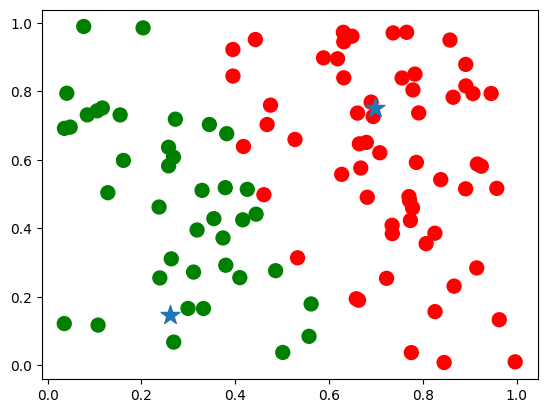

In [42]:
colors = np.array(["red", "green"])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()

Solution
===

In [43]:
def compute_log_p_naive(X, mean, sigma):
    """
    Compute the log probability of each data point in X under a Gaussian distribution

    Args:
        X: (n, d) numpy array, where each row corresponds to a data point
        mean: (d, ) numpy array, the mean of the Gaussian distribution
        sigma: (d, d) numpy array, the covariance matrix of the Gaussian distribution

    Returns:
        log_p: (n, ) numpy array, the log probability of each data point

    >>> compute_log_p_naive(np.array([[0, 0], [1, 1]]), np.array([0, 0]), np.eye(2))
    array([-1.83787707, -2.83787707])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************
    log_probs = []
    constant = np.log(1 / (np.power(2 * np.pi, X.shape[1] / 2) * np.sqrt(np.linalg.det(sigma))))
    sigma_inv = np.linalg.inv(sigma)
    for i in range(X.shape[0]):
        x = X[i]
        log_probs.append(constant + 
                     (-1/2) * np.dot(x-mean, sigma_inv @ (x-mean)))
    return np.array(log_probs)


test(compute_log_p_naive)

✅ Your `compute_log_p_naive` passed 1 tests.


In [44]:
log_ps = [
    compute_log_p_naive(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping

In [45]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]


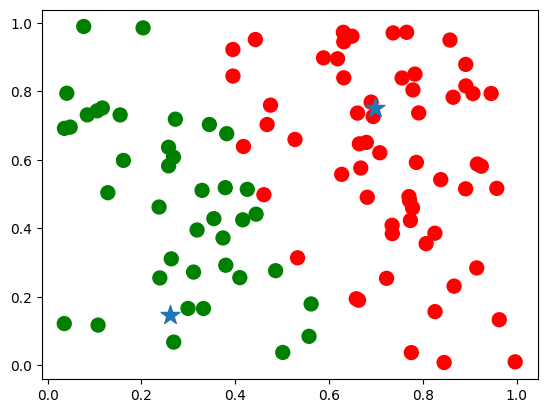

In [46]:
colors = np.array(["red", "green"])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()

In [47]:
def makeGraph(function, X, means, sigmas):
    log_ps = [function(X, m, s) for m, s in zip(means, sigmas)]

    assignments = np.argmax(log_ps, axis=0)

    colors = np.array(["red", "green"])[assignments]
    plt.title(function.__name__)
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
    plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
    plt.show()

In [50]:
def is_diagonal(matrix):
    # Get the diagonal elements of the matrix
    diagonal_elements = np.diag(np.diag(matrix))
    
    # Check if the original matrix is equal to the matrix of diagonal elements
    return np.array_equal(matrix, diagonal_elements)

# is_diagonal(sigmas[0])

|a-b|_2 = 5.6534230881029115e-15


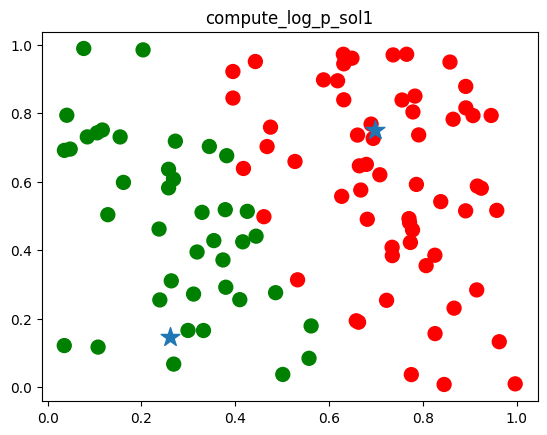

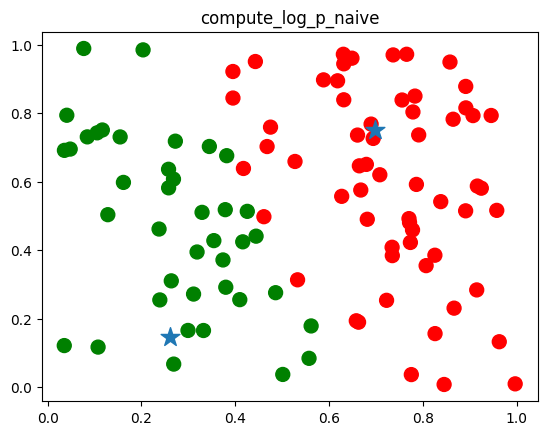

In [52]:
def compute_log_p_sol1(X, mean, sigma):
    """
    Compute the log probability of each data point in X under a Gaussian distribution

    Args:
        X: (n, d) numpy array, where each row corresponds to a data point
        mean: (d, ) numpy array, the mean of the Gaussian distribution
        sigma: (d, d) numpy array, the covariance matrix of the Gaussian distribution

    Returns:
        log_p: (n, ) numpy array, the log probability of each data point

    >>> compute_log_p_sol1(np.array([[0, 0], [1, 1]]), np.array([0, 0]), np.eye(2))
    array([-1.83787707, -2.83787707])
    """
    # fail if the diagonal assumption fails
    assert is_diagonal(sigma)

    sigma_inv = np.linalg.inv(sigma)
    n, d = X.shape
    constant = -1 * (np.log(np.pi * 2) * d / 2 + np.log(np.linalg.det(sigma)) / 2)

    XminusMu = X - np.tile(mean.reshape((1, d)), (n, 1))
    XminusMuSquared = XminusMu * XminusMu
    variable = (-1/2) * (XminusMuSquared @ np.diag(sigma_inv).reshape((d, 1))) 
    return constant + variable.reshape((n,))


### -----
### Difference between solution and this implementation

a = compute_log_p_sol1(X, means[0], sigmas[0])
b = compute_log_p_naive(X, means[0], sigmas[0])
print("|a-b|_2 =", np.linalg.norm(a - b))

### -----
### Print the graphs

makeGraph(compute_log_p_sol1, X, means, sigmas)
makeGraph(compute_log_p_naive, X, means, sigmas)

|a-b|_2 = 1.8038988979531736e-15


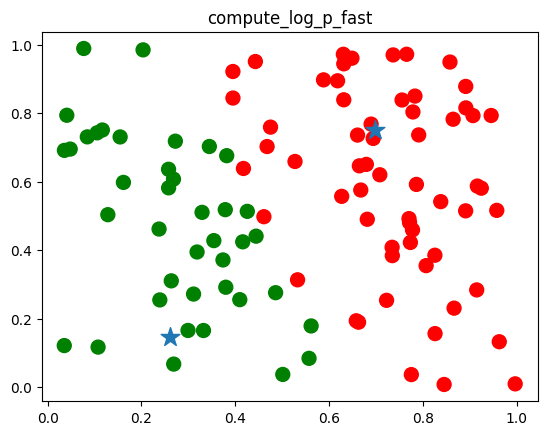

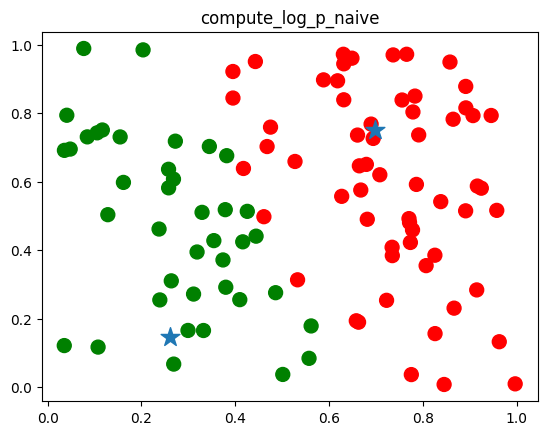

In [54]:
def compute_log_p_fast(X, mean, sigma):
    """
    Compute the log probability of each data point in X under a Gaussian distribution

    Args:
        X: (n, d) numpy array, where each row corresponds to a data point
        mean: (d, ) numpy array, the mean of the Gaussian distribution
        sigma: (d, d) numpy array, the covariance matrix of the Gaussian distribution

    Returns:
        log_p: (n, ) numpy array, the log probability of each data point

    >>> compute_log_p_sol1(np.array([[0, 0], [1, 1]]), np.array([0, 0]), np.eye(2))
    array([-1.83787707, -2.83787707])
    """

    sigma_inv = np.linalg.inv(sigma)
    n, d = X.shape
    constant = -1 * (np.log(np.pi * 2) * d / 2 + np.log(np.linalg.det(sigma)) / 2)

    XminusMu = X - np.tile(mean.reshape((1, d)), (n, 1))
    variable = (-1/2) * np.sum(XminusMu * (sigma_inv @ XminusMu.transpose()).transpose(), axis=1)
    return constant + variable

### -----
### Difference between naive and this implementation

a = compute_log_p_fast(X, means[0], sigmas[0])
b = compute_log_p_naive(X, means[0], sigmas[0])
print("|a-b|_2 =", np.linalg.norm(a - b))

makeGraph(compute_log_p_fast, X, means, sigmas)
makeGraph(compute_log_p_naive, X, means, sigmas)

In [55]:
import time


def generateData(n, d, k):
    X = rand(n, d)
    means = [
        rand(d) * 0.5 + 0.5,
        -rand(d) * 0.5 + 0.5,
    ]  # for better plotting when k = 2
    S = np.diag(rand(d))
    sigmas = [S] * k

    return X, means, sigmas


matrix_time = np.zeros(
    10,
)
forloop_time = np.zeros(
    10,
)
i = 0
Ns = np.logspace(0, 7, num=10)
for N in Ns:
    X_n, means_n, sigmas_n = generateData(int(np.floor(N)), 2, 2)

    start_time = time.time()
    compute_log_p_fast(X_n, means_n[0], sigmas_n[0])
    matrix_time[i] = time.time() - start_time

    start_time = time.time()
    compute_log_p_naive(X_n, means_n[0], sigmas_n[0])
    forloop_time[i] = time.time() - start_time

    i += 1

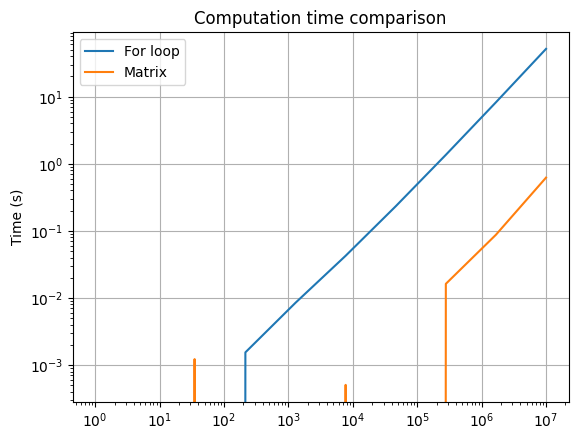

In [56]:
plt.title("Computation time comparison")
h1 = plt.plot(np.floor(Ns), forloop_time, label="For loop")
h2 = plt.plot(np.floor(Ns), matrix_time, label="Matrix")
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Time (s)")
plt.legend(["For loop", "Matrix"])
plt.grid()
plt.show()

In [59]:
import datetime
import timeit


def generateData(n, d, k):
    X = rand(n, d)
    means = [
        rand(d) * 0.5 + 0.5,
        -rand(d) * 0.5 + 0.5,
    ]  # for better plotting when k = 2
    S = np.diag(rand(d))
    sigmas = [S] * k

    return X, means, sigmas


matrix_time = np.zeros(
    10,
)
diag_time = np.zeros(
    10,
)
i = 0
Ns = np.logspace(0, 7, num=10)
for N in Ns:
    X_n, means_n, sigmas_n = generateData(int(np.floor(N)), 2, 2)

    start_time = time.time()
    compute_log_p_fast(X_n, means_n[0], sigmas_n[0])
    matrix_time[i] = time.time() - start_time

    start_time = time.time()
    compute_log_p_sol1(X_n, means_n[0], sigmas_n[0])
    diag_time[i] = time.time() - start_time

    i += 1

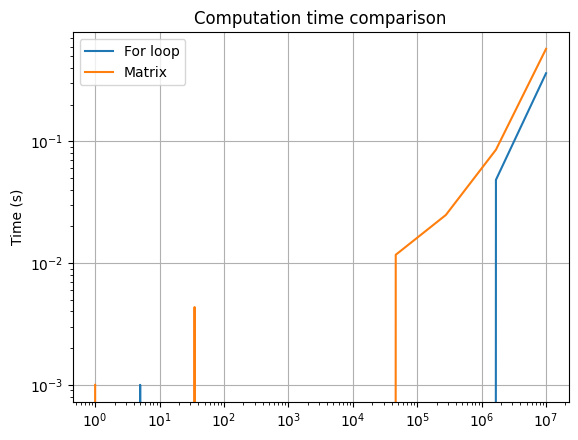

In [62]:
plt.title("Computation time comparison")
h1 = plt.plot(np.floor(Ns), diag_time, label="diag assumption")
h2 = plt.plot(np.floor(Ns), matrix_time, label="Matrix")
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Time (s)")
plt.legend(["For loop", "Matrix"])
plt.grid()
plt.show()